numpy.insert(arr,obj,value,axis=None)  

arr:为目标向量 

obj:为目标位置 

value:为想要插入的数值 

axis:为插入的维度

In [79]:
a = np.array(np.arange(12).reshape(3,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
# axis = 0(axis=0 along the rows),在 index=1 的地方插入[1,1,1,1]
np.insert(a,1,[1,1,1,1],0)

array([[ 0,  1,  2,  3],
       [ 1,  1,  1,  1],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

np.newaxis

https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it

In [88]:
a = np.array(np.arange(12).reshape(1,3,4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [89]:
a[0,0]

array([0, 1, 2, 3])

In [91]:
a[0,1]

array([4, 5, 6, 7])

In [85]:
# window_size 只在这里出现过，而且实验证明只能取1
# prediction_len 建立新的feature
def predict_sequences_multiple(model, data, window_size, prediction_len):
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            # 这一行是在干嘛。。？？新加一个维度
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            # 必须是1，不然：list index out of range
            # 不懂为啥是1
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

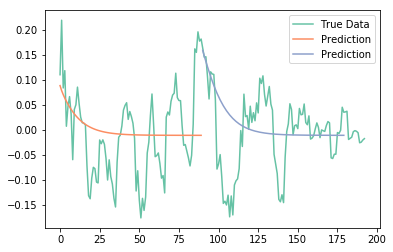

In [86]:
# Plot the predictions! 
predictions = predict_sequences_multiple(model, X_test, 10, 90)
plot_results_multiple(predictions, y_test, 90)

In [87]:
# 错误的
predictions = predict_sequences_multiple(model, X_test, 90, 7)
plot_results_multiple(predictions, y_test, 7)

TypeError: %i format: a number is required, not list

### Shift one day to further analyzed.

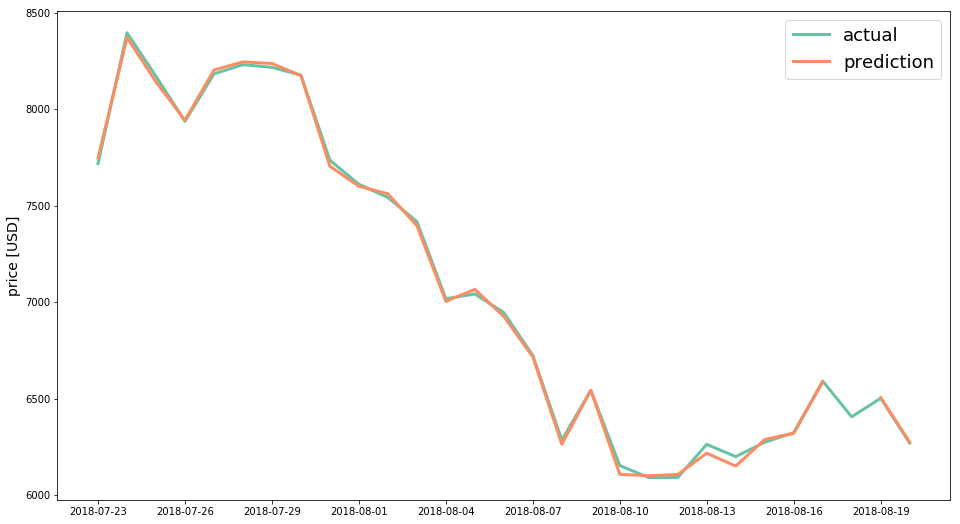

In [37]:
n_points = 30
line_plot(targets[-n_points:][:-1], preds[-n_points:].shift(-1), 'actual', 'prediction', lw=3)

### Correlation test

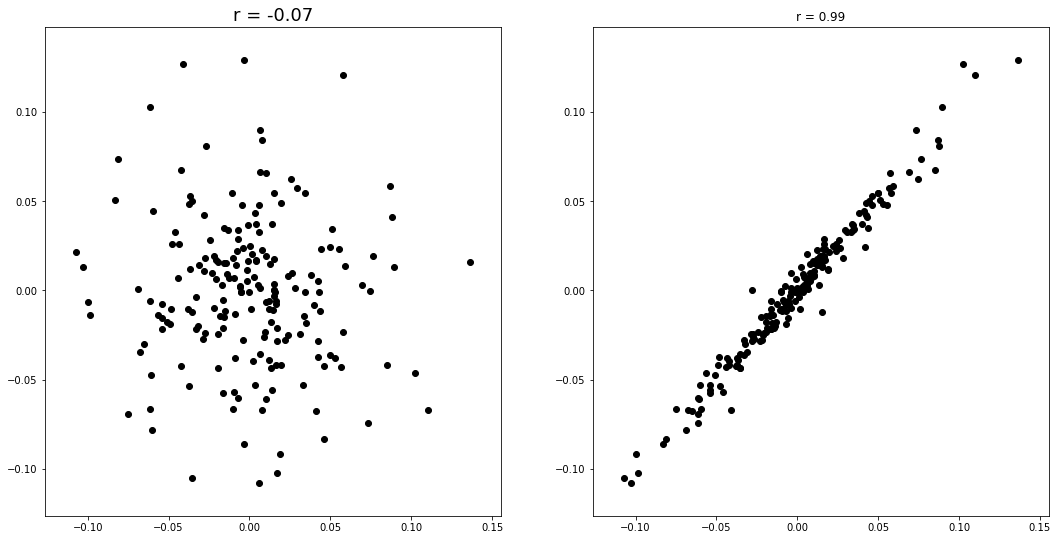

In [39]:
actual_returns = targets.pct_change()[1:]
predicted_returns = preds.pct_change()[1:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
# actual correlation
corr = np.corrcoef(actual_returns, predicted_returns)[0][1]
ax1.scatter(actual_returns, predicted_returns, color='k')
ax1.set_title('r = {:.2f}'.format(corr), fontsize=18)
# shifted correlation
shifted_actual = actual_returns[:-1]
shifted_predicted = predicted_returns.shift(-1).dropna()
corr = np.corrcoef(shifted_actual, shifted_predicted)[0][1]
ax2.scatter(shifted_actual, shifted_predicted, color='k')
ax2.set_title('r = {:.2f}'.format(corr));

After predicted price is shifted one day back, the correlation is 0.98, almost 1, which means the prediced price is the same as previous day actual price.

In conclusion, this basic model is not practical at all.